#Parte 2

In [1]:
# Importes necessários
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from tabulate import tabulate
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

Demonstramos aqui como o banco de dados está composto, imprimindo suas 5 primeiras e últimas linhas em uma tabela juntamente com a classificação dada.

In [2]:
data = load_breast_cancer(as_frame=True)

# Criar um DataFrame com os dados e os nomes das características
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Substituir os valores numéricos da coluna 'target' pelos nomes das classes correspondentes
df['target'] = df['target'].replace(dict(enumerate(data.target_names)))

df = pd.concat([df.head(), df.tail()])
print(tabulate(df, headers='keys', tablefmt='psql'))



+-----+---------------+----------------+------------------+-------------+-------------------+--------------------+------------------+-----------------------+-----------------+--------------------------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+----------------+-----------------+-------------------+--------------+--------------------+---------------------+-------------------+------------------------+------------------+---------------------------+-----------+
|     |   mean radius |   mean texture |   mean perimeter |   mean area |   mean smoothness |   mean compactness |   mean concavity |   mean concave points |   mean symmetry |   mean fractal dimension |   radius error |   texture error |   perimeter error |   area error |   smoothness error |   compactness error |   concavity error |   concave points error |   symmetry err

Como vimos anteriormente, na tabela, percebemos que o banco de dados é composto por 30 atributos, para termos uma visualização da distribuição das classes aplicamos uma redução de dimensionalidade, PCA. Assim, podemos ter um gráfico 2D da distribuição das classes.

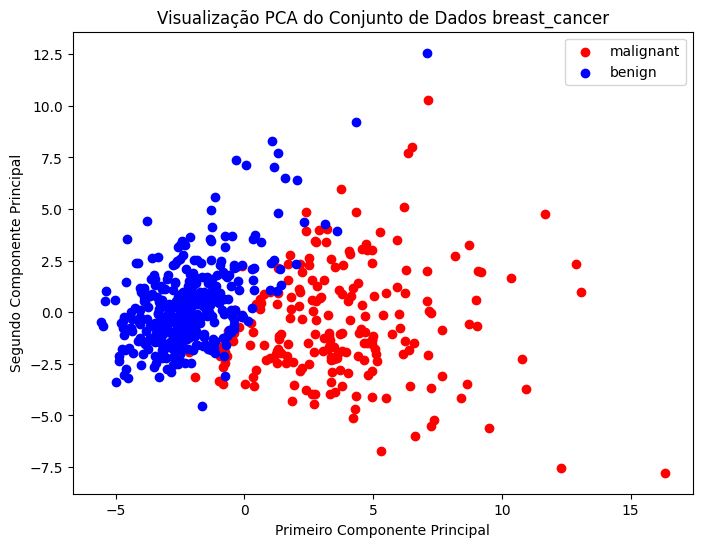

In [3]:
X = data.data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
colors = ['red', 'blue']
unique_labels = np.unique(data.target)
for i, label in enumerate(unique_labels):
    mask = data.target == label
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], color=colors[i], label=data.target_names[label])

plt.xlabel('Primeiro Componente Principal')
plt.ylabel('Segundo Componente Principal')
plt.title('Visualização PCA do Conjunto de Dados breast_cancer')
plt.legend()
plt.show()


Fazemos a fase de treinamento, teste e avaliação dos 4 algoritmos (**Logistic Regression**, **KNN**, **SVM**, **Random Forest**) no banco de dados. Tendo a matriz de confusão de cada algoritmo.

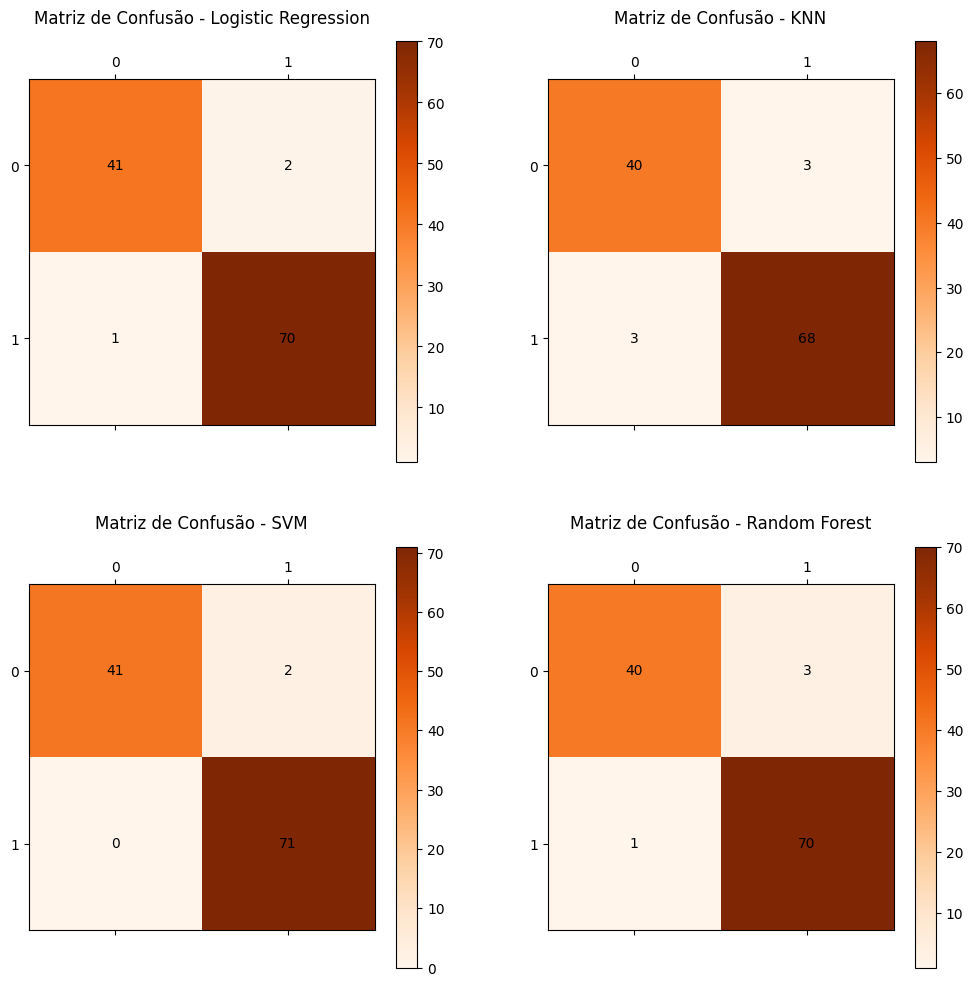

In [4]:
data = load_breast_cancer(as_frame=True)
X = data.data
y = data.target

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Padronizar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir os modelos
models = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("SVM", SVC()),
    ("Random Forest", RandomForestClassifier())
]

precisao = []
recall = []
f_score = []
acuracia = []

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Treinar e avaliar cada modelo
for i, (name, model) in enumerate(models):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Calcule a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)
    ax = axs[i//2, i%2]
    cax = ax.matshow(cm, cmap=plt.cm.Oranges)
    fig.colorbar(cax, ax=ax)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, cm[i, j], ha='center', va='center')

    ax.set_title('Matriz de Confusão - ' + name, pad=40)

    # Calcula a precisão
    precisao.append(precision_score(y_test, y_pred, average='macro'))

    # Calcula o recall
    recall.append(recall_score(y_test, y_pred, average='macro'))

    # Calcula o F-score
    f_score.append(f1_score(y_test, y_pred, average='macro'))

    # Calcula a Acurácia
    acuracia.append(accuracy_score(y_test, y_pred))

plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()


Exibimos também os graficos em barras dos parametros: Precisão, Recall, F-Score e Acurácia, para comparação de eficiência entre os 4 algoritmos.

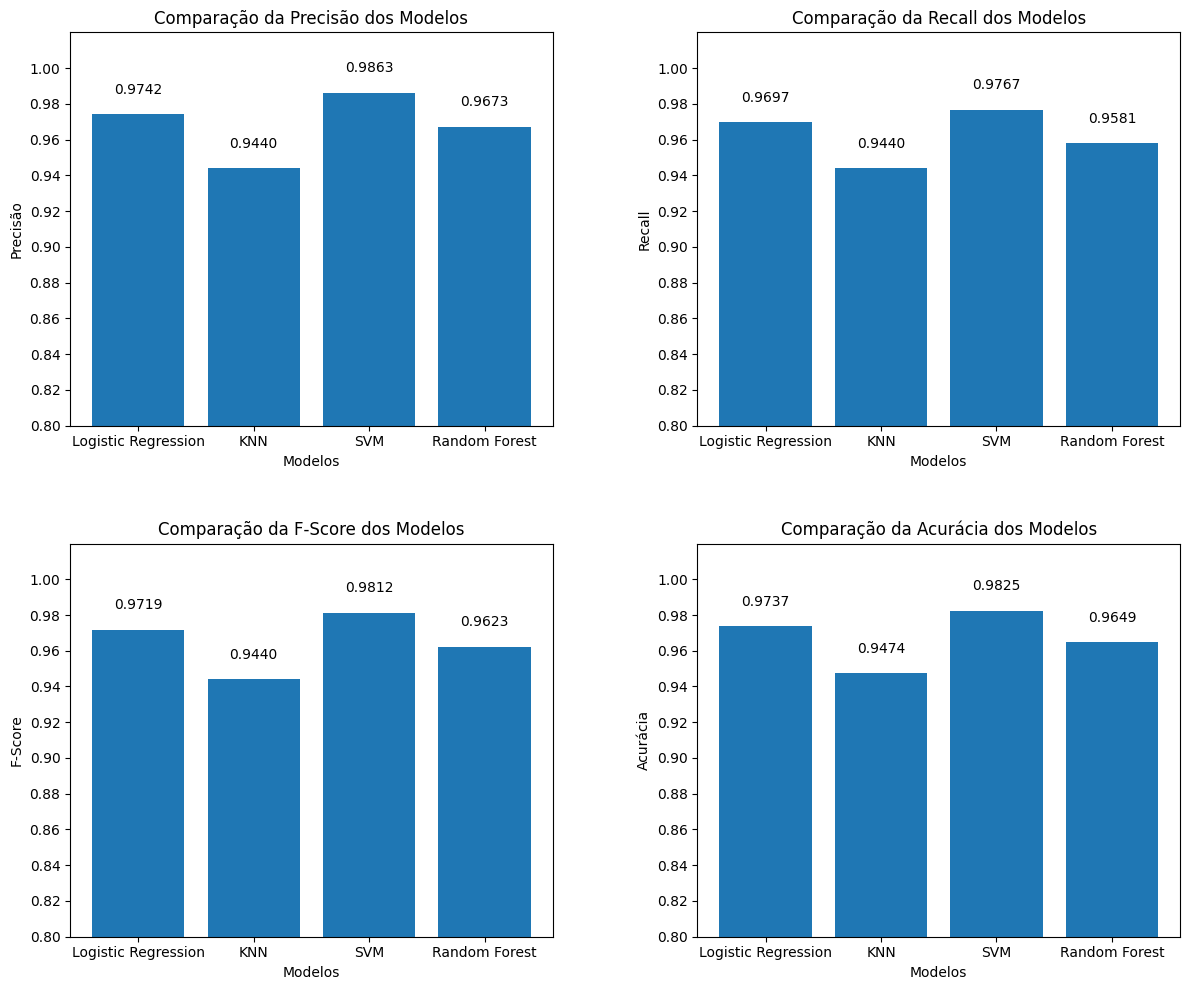

In [5]:
model_names = ['Logistic Regression', 'KNN', 'SVM', 'Random Forest']
valores = [precisao, recall, f_score, acuracia]
titulos = ['Precisão', 'Recall', 'F-Score', 'Acurácia']

plt.figure(figsize=(12, 10))

for i in range(4):
    plt.subplot(2, 2, i+1)
    rects = plt.bar(model_names, valores[i])
    plt.xlabel('Modelos')
    plt.ylabel(titulos[i])
    plt.title('Comparação da ' + titulos[i] + ' dos Modelos')
    plt.ylim(0.8, 1.02)
    plt.yticks(np.arange(0.8, 1.02, 0.02))
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                '{:.4f}'.format(height),
                ha='center', va='bottom')
plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()
